In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('df_tratado.csv')

# Realizando o treinamento

In [34]:
x = df.drop(columns='Target')
x

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
y = df['Target']
y

0       Desistente
1         Graduado
2       Desistente
3         Graduado
4         Graduado
           ...    
4419      Graduado
4420    Desistente
4421    Desistente
4422      Graduado
4423      Graduado
Name: Target, Length: 4424, dtype: object

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_split, x_test, y_split, y_test = train_test_split(x, y, test_size=.15, stratify=y, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_split, y_split, stratify=y_split, random_state=42)

In [38]:
print(x_split.shape[0])
print(x_valid.shape[0])
print(x_test.shape[0])

3760
940
664


---

Sem hiperparâmetros

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(x_train, y_train)
y_predict = rfc_model.predict(x_valid)

In [41]:
print(rfc_model.score(x_train, y_train))
print(rfc_model.score(x_valid, y_valid))

0.9975177304964539
0.7851063829787234


Com hiperparâmetros

In [42]:
rfc_model = RandomForestClassifier(random_state=42, max_depth=10)
rfc_model.fit(x_train, y_train)
y_predict = rfc_model.predict(x_valid)

print(rfc_model.score(x_train, y_train))
print(rfc_model.score(x_valid, y_valid))

0.8929078014184397
0.7914893617021277


# Avaliando o modelo

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

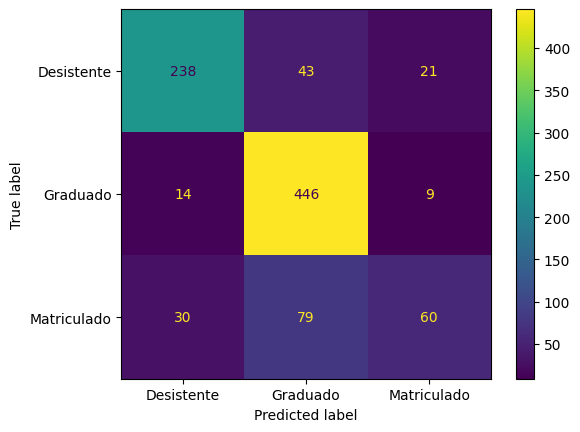

In [44]:
cm_graph = ConfusionMatrixDisplay(confusion_matrix(y_valid, y_predict), display_labels=rfc_model.classes_)
cm_graph.plot();

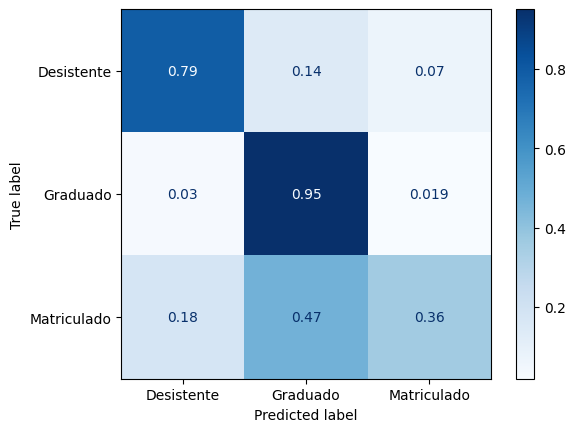

In [45]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_predict, normalize='true', cmap='Blues')

---

In [46]:
from sklearn.metrics import classification_report

In [47]:
rfc_report = classification_report(y_valid, y_predict)
print(rfc_report)

              precision    recall  f1-score   support

  Desistente       0.84      0.79      0.82       302
    Graduado       0.79      0.95      0.86       469
 Matriculado       0.67      0.36      0.46       169

    accuracy                           0.79       940
   macro avg       0.77      0.70      0.71       940
weighted avg       0.78      0.79      0.77       940



---

Balanceando os dados com over

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
oversample = SMOTE(random_state=42)
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

In [50]:
rfc_model_over = RandomForestClassifier(max_depth=10, random_state=42)
rfc_model.fit(x_train_over, y_train_over)
y_predict_over = rfc_model.predict(x_valid)

              precision    recall  f1-score   support

  Desistente       0.86      0.74      0.80       302
    Graduado       0.83      0.88      0.85       469
 Matriculado       0.53      0.57      0.55       169

    accuracy                           0.78       940
   macro avg       0.74      0.73      0.73       940
weighted avg       0.79      0.78      0.78       940



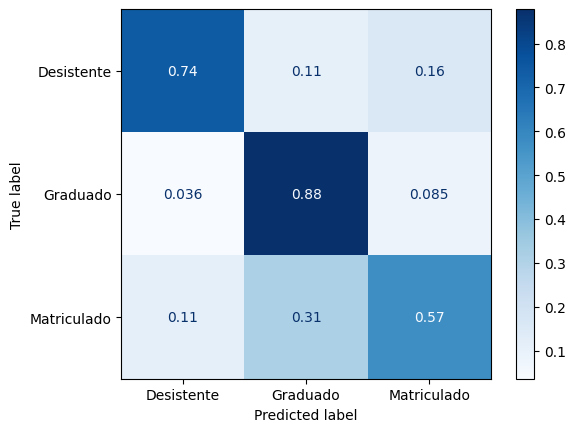

In [51]:
print(ConfusionMatrixDisplay.from_predictions(y_valid, y_predict_over, normalize='true', cmap='Blues'));
print(classification_report(y_valid, y_predict_over))

### Balanceando os dados com under

In [52]:
from imblearn.under_sampling import NearMiss

In [53]:
undersample = NearMiss(version=1)
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

In [54]:
rfc_model_under = RandomForestClassifier(max_depth=10, random_state=42)
rfc_model_under.fit(x_train_under, y_train_under)
y_predict_under = rfc_model_under.predict(x_valid)

              precision    recall  f1-score   support

  Desistente       0.84      0.72      0.78       302
    Graduado       0.85      0.60      0.71       469
 Matriculado       0.35      0.73      0.47       169

    accuracy                           0.66       940
   macro avg       0.68      0.68      0.65       940
weighted avg       0.76      0.66      0.69       940



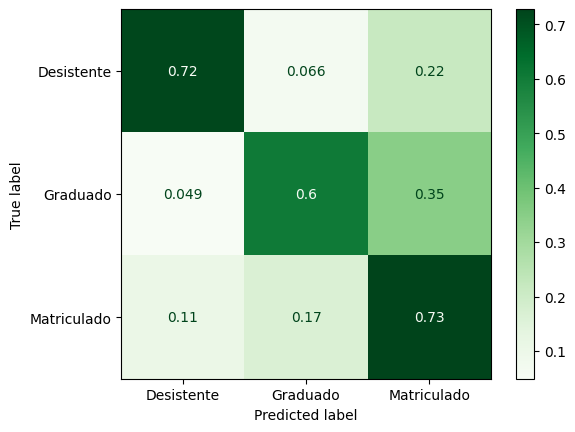

In [55]:
print(ConfusionMatrixDisplay.from_predictions(y_valid, y_predict_under, normalize='true', cmap='Greens'));
print(classification_report(y_valid, y_predict_under))

# Validando o modelo

Random Forest

In [56]:
from imblearn.pipeline import Pipeline as imbpipeline

In [57]:
oversample_pipeline = SMOTE(random_state=42)
rfc_model_over_pipeline = RandomForestClassifier(max_depth=10, random_state=42)

pipeline_rfc = imbpipeline(
    [('oversample', oversample_pipeline), ('floresta', rfc_model_over_pipeline)]
)

In [58]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [59]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(pipeline_rfc, x_split, y_split, cv=skf, scoring='recall_weighted')

In [60]:
media = cv_resultados['test_score'].mean() * 100
dp = cv_resultados['test_score'].std() * 100

print(f'Intervalo de confiança: [{(media - dp*2):.0f},{(media + dp*2):.0f}]')

Intervalo de confiança: [74,80]


### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
oversample_pipeline = SMOTE(random_state=42)
dtc_model_over_pipeline = DecisionTreeClassifier(max_depth=10, random_state=42)

pipeline_dtc = imbpipeline(
    [('oversample', oversample_pipeline), ('arvore', dtc_model_over_pipeline)]
)

In [63]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados_dtc = cross_validate(pipeline_dtc, x_split, y_split, cv=skf, scoring='recall_weighted')

In [64]:
media = cv_resultados_dtc['test_score'].mean() * 100
dp = cv_resultados_dtc['test_score'].std() * 100

print(f'Intervalo de confiança: [{(media - dp*2):.0f},{(media + dp*2):.0f}]')

Intervalo de confiança: [70,74]


**Final do modelo**

In [65]:
oversample_final = SMOTE(random_state=42)
x_train_final, y_train_final = oversample_final.fit_resample(x_split, y_split)

In [66]:
rfc_model_final = RandomForestClassifier(max_depth=10, random_state=42)
rfc_model_final.fit(x_train_final, y_train_final)
y_predict_final = rfc_model_final.predict(x_test)

              precision    recall  f1-score   support

  Desistente       0.86      0.69      0.77       213
    Graduado       0.83      0.87      0.85       332
 Matriculado       0.41      0.50      0.45       119

    accuracy                           0.75       664
   macro avg       0.70      0.69      0.69       664
weighted avg       0.77      0.75      0.75       664



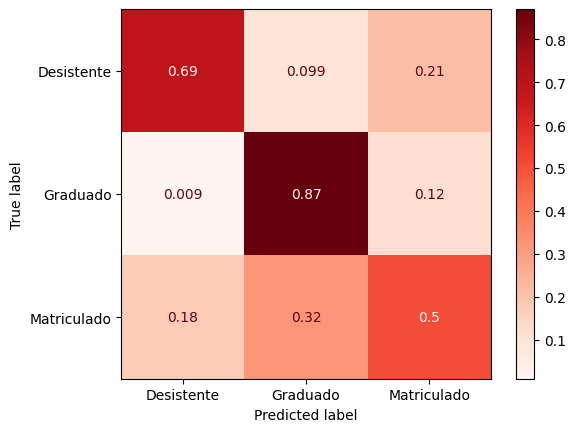

In [67]:
print(classification_report(y_test, y_predict_final))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_predict_final, normalize='true', cmap='Reds'));

# Desafios

In [68]:
import seaborn as sns

In [69]:
data = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv')
data.sample()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
3122,Solteiro,Sim,Feminino,19,Não,Não,Não,Sim,Sim,7.6,...,3,10.5,0,0,5,6,4,11.75,1,Matriculado


In [70]:
color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))

<Axes: xlabel='Migração', ylabel='count'>

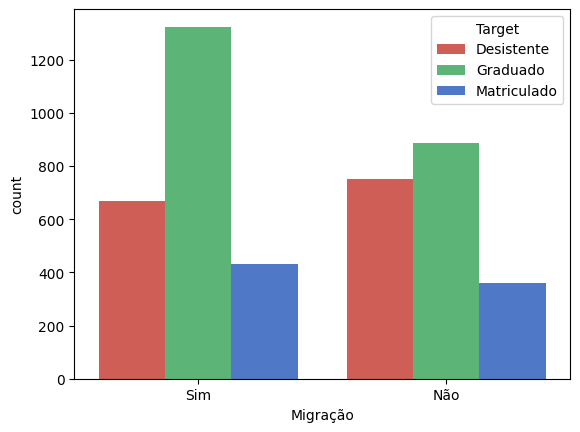

In [71]:
sns.countplot(data, x='Migração', hue='Target')

In [72]:
data.groupby('Target')['Necessidades educacionais especiais'].value_counts(normalize=True)

Target       Necessidades educacionais especiais
Desistente   Não                                    0.988037
             Sim                                    0.011963
Graduado     Não                                    0.989588
             Sim                                    0.010412
Matriculado  Não                                    0.986146
             Sim                                    0.013854
Name: proportion, dtype: float64

<Axes: xlabel='Necessidades educacionais especiais', ylabel='count'>

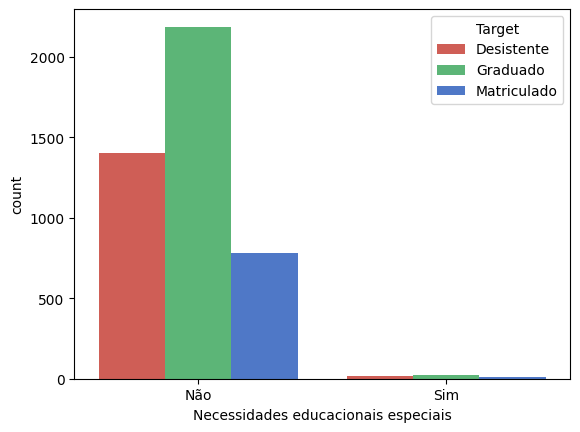

In [73]:
sns.countplot(data, x='Necessidades educacionais especiais', hue='Target')

<Axes: ylabel='Taxa de desemprego'>

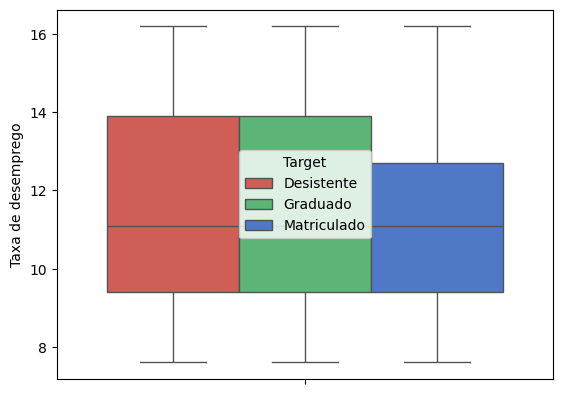

In [74]:
sns.boxplot(data, y='Taxa de desemprego', hue='Target')

<Axes: ylabel='Taxa de inflação'>

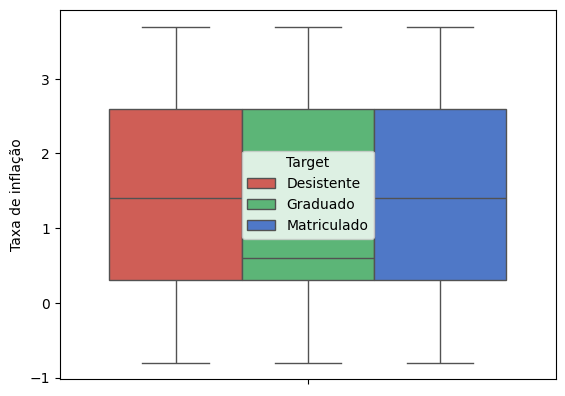

In [75]:
sns.boxplot(data, y='Taxa de inflação', hue='Target')

<Axes: ylabel='PIB'>

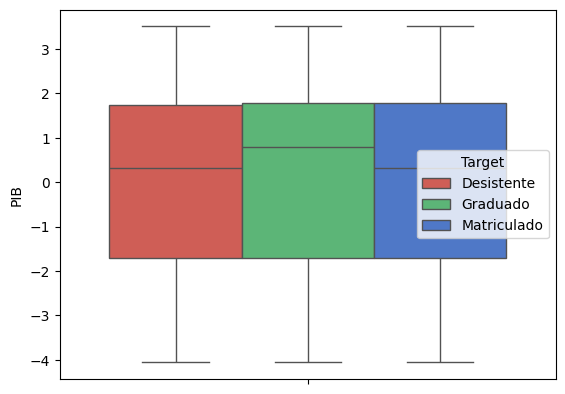

In [76]:
sns.boxplot(data, y='PIB', hue='Target')

In [77]:
data['Qualificação prévia'].value_counts(normalize=True)

Qualificação prévia
Educação secundária                                         0.840190
Curso de especialização tecnológica                         0.049503
Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente    0.036618
Educação superior - licenciatura                            0.028481
Outro - 11º ano de escolaridade                             0.010172
Educação superior - licenciatura (1º ciclo)                 0.009042
Curso técnico superior profissional                         0.008137
Educação superior - bacharelado                             0.005199
Frequência de educação superior                             0.003617
12º ano de escolaridade - não concluído                     0.002486
Educação superior - mestrado                                0.001808
Educação básica 2º ciclo (6º/7º/8º ano) ou equivalente      0.001582
Educação superior - mestrado (2º ciclo)                     0.001356
11º ano de escolaridade - não concluído                     0.000904
10º ano de esc

In [78]:
data.groupby('Target')['Qualificação prévia'].value_counts(normalize=True)

Target       Qualificação prévia                                     
Desistente   Educação secundária                                         0.758621
             Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente    0.073188
             Educação superior - licenciatura                            0.052780
             Curso de especialização tecnológica                         0.048557
             Outro - 11º ano de escolaridade                             0.018297
             Educação superior - bacharelado                             0.011260
             Educação superior - licenciatura (1º ciclo)                 0.009852
             12º ano de escolaridade - não concluído                     0.007741
             Frequência de educação superior                             0.004926
             Curso técnico superior profissional                         0.004222
             Educação superior - mestrado                                0.002815
             11º ano de esco

## 2

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gbc_model = GradientBoostingClassifier(max_depth=5, random_state=42)
gbc_model.fit(x_train, y_train)
y_predict_gbc = gbc_model.predict(x_valid)

In [86]:
print(classification_report(y_valid, y_predict_gbc))

              precision    recall  f1-score   support

  Desistente       0.82      0.80      0.81       302
    Graduado       0.82      0.93      0.87       469
 Matriculado       0.60      0.42      0.49       169

    accuracy                           0.79       940
   macro avg       0.75      0.71      0.72       940
weighted avg       0.78      0.79      0.78       940



## 3

In [92]:
oversample_gbc = SMOTE(random_state=42)
x_train_over_gbc, y_train_over_gbc = oversample_gbc.fit_resample(x_train, y_train)

In [95]:
gbc_model_over = GradientBoostingClassifier(max_depth=5, random_state=42)
gbc_model_over.fit(x_train_over_gbc, y_train_over_gbc)
y_predict_gbc_over = gbc_model_over.predict(x_valid)

              precision    recall  f1-score   support

  Desistente       0.83      0.79      0.81       302
    Graduado       0.82      0.89      0.85       469
 Matriculado       0.57      0.48      0.52       169

    accuracy                           0.79       940
   macro avg       0.74      0.72      0.73       940
weighted avg       0.78      0.79      0.78       940



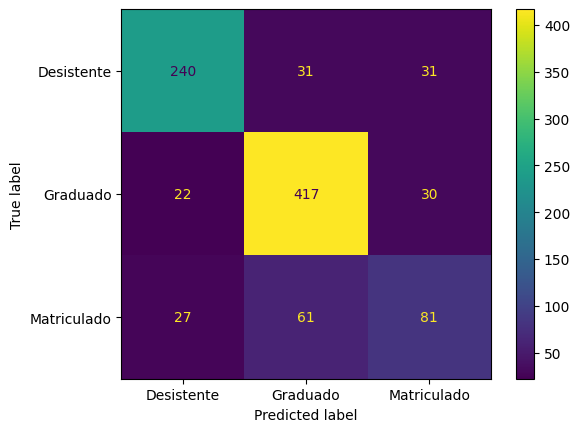

In [94]:
print(ConfusionMatrixDisplay.from_predictions(y_valid, y_predict_gbc_over))
print(classification_report(y_valid, y_predict_gbc_over))

              precision    recall  f1-score   support

  Desistente       0.84      0.81      0.82       302
    Graduado       0.83      0.90      0.86       469
 Matriculado       0.59      0.49      0.53       169

    accuracy                           0.80       940
   macro avg       0.75      0.73      0.74       940
weighted avg       0.79      0.80      0.79       940



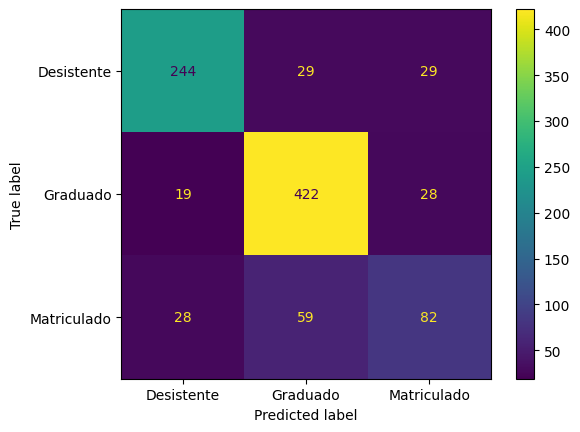

In [96]:
print(ConfusionMatrixDisplay.from_predictions(y_valid, y_predict_gbc_over))
print(classification_report(y_valid, y_predict_gbc_over))